## **Q.1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression



np.random.seed(7)
X = np.random.rand(100)

Y= 0.1 * X**2 + 1.1*X + np.random.rand(100)

def hypothesis_linear(w, x, b):
    return w * x + b

def loss_function_linear(Y, h):
    return np.mean(np.abs(Y - h) ** 3)

def gradient_descent_linear(w_linear, b_linear, X, Y, alpha):
    y_hat= hypothesis_linear(w_linear, X, b_linear)
    dw_linear = -3 * np.sum(X * (Y -y_hat) ** 2 * np.sign(Y -y_hat))
    db_linear = -3 * np.sum((Y -y_hat) ** 2 * np.sign(Y -y_hat))
    w_linear = w_linear - alpha * dw_linear
    b_linear = b_linear - alpha * db_linear
    return w_linear, b_linear

epoch_linear = 5000000
alpha_linear = 0.0000001
w_linear = np.random.randn(1)
b_linear = np.random.randn(1)

for i in range(epoch_linear):
    w_linear, b_linear = gradient_descent_linear(w_linear, b_linear, X, Y, alpha_linear)


def hypothesis_poly(u, v, w, x):
    return u * x + v * x**2 + w

def loss_function_poly(Y,y_hat):
    return np.mean(np.abs(Y -y_hat) ** 7)

def gradient_descent_poly(u, v, w, X, Y, alpha):
    y_hat= hypothesis_poly(u, v, w, X)
    du = -7 * np.sum(X * (Y -y_hat) ** 6 * np.sign(Y -y_hat))
    dv = -7 * np.sum((Y -y_hat) ** 6 * X**2 * np.sign(Y -y_hat))
    dw = -7 * np.sum((Y -y_hat) ** 6 * np.sign(Y -y_hat))
    u = u - alpha * du
    v = v - alpha * dv
    w = w - alpha * dw
    return u, v, w

epoch_poly = 2
alpha_poly = 0.000000000000000000000000000000000000001

u_poly, v_poly, w_poly = 1, 0.4, 0.6

for i in range(epoch_poly):
    u_poly, v_poly, w_poly = gradient_descent_poly(u_poly, v_poly, w_poly, X, Y, alpha_poly)


X_reshaped = X.reshape(-1, 1)
model_sklearn = LinearRegression()
model_sklearn.fit(X_reshaped, Y)

plt.scatter(X, Y, label='Dataset')
plt.plot(X, hypothesis_linear(w_linear, X, b_linear), label='Linear Regression (|x - xhat|^3)')
plt.plot(X, hypothesis_poly(u_poly, v_poly, w_poly, X), label='Polynomial Regression (|x - xhat|^7)')
plt.plot(X, model_sklearn.predict(X_reshaped), label='Linear Regression (scikit-learn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("Linear Regression Coefficients (|x - xhat|^3):")
print("w:", w_linear)
print("b:", b_linear)

print("\nPolynomial Regression Coefficients (|x - xhat|^7):")
print("u:", u_poly)
print("v:", v_poly)
print("w:", w_poly)

print("\nLinear Regression Coefficients (scikit-learn):")
print("Intercept:", model_sklearn.intercept_)
print("Coefficient:", model_sklearn.coef_[0])


# **Q.2**

KeyError: 'CO(GT)'

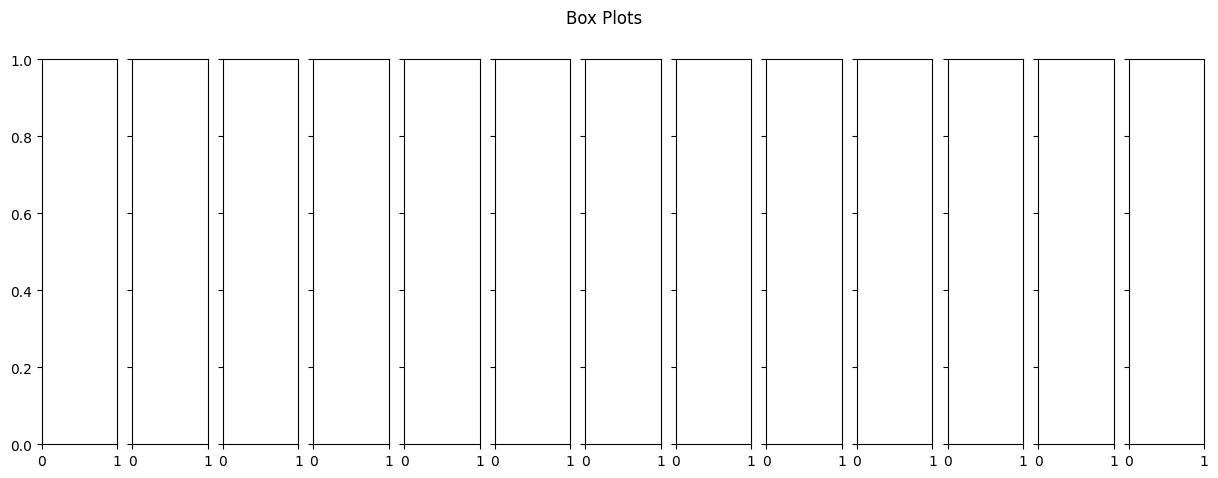

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import seaborn as sns

# Load the dataset
file = pd.read_csv('/content/AirQualityUCI.csv')
df= pd.DataFrame(file)

fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")

sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")

correlation_matrix = df.iloc[:,2:].corr()
correlation_matrix.RH[abs(correlation_matrix['RH'])>0.05].index
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
percentile25=df['CO(GT)'].quantile(0.25)
percentile75=df['CO(GT)'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+iqr
lower_limit=percentile25-iqr

lower_limit

filtered_subset = df.loc[df["CO(GT)"] < lower_limit].copy()

filtered_subset.loc[:, 'CO(GT)'] = lower_limit

df.loc[filtered_subset.index] = filtered_subset

upper_limit


filtered_subset = df.loc[df["CO(GT)"] < upper_limit].copy()


filtered_subset.loc[:, 'CO(GT)'] = upper_limit


df.loc[filtered_subset.index] = filtered_subset

sns.boxplot(df['CO(GT)'])
for i in range(10):
    percentile25=df[df.columns[i+2]].quantile(0.25)
    percentile75=df[df.columns[i+2]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+iqr
    lower_limit=percentile25-iqr

    lower_limit

    filtered_subset = df.loc[df[df.columns[i+2]] < lower_limit].copy()


    filtered_subset.loc[:, df.columns[i+2]] = lower_limit


    df.loc[filtered_subset.index] = filtered_subset

    upper_limit

    filtered_subset = df.loc[df[df.columns[i+2]] < upper_limit].copy()


    filtered_subset.loc[:, df.columns[i+2]] = upper_limit


    df.loc[filtered_subset.index] = filtered_subset

df=df.drop(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)','Date','Time'], axis=1)
y=df['RH']
df.drop(['RH'],axis=1)
X=df



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


def hypothesis_linear(w, x, b):
    return w * x + b

def loss_function_linear(Y, h):
    return np.mean(np.abs(Y - h) ** 2)

def gradient_descent_linear(w_linear, b_linear, X, Y, alpha_linear):
    y_hat = hypothesis_linear(w_linear, X, b_linear)
    dw_linear = 2 * np.sum(X * (Y - y_hat) ** 2)
    db_linear = 2 * np.sum((Y - y_hat) ** 2)
    w_linear = w_linear - alpha_linear * dw_linear
    b_linear = b_linear - alpha_linear * db_linear
    return w_linear, b_linear

epoch_linear = 5000000
alpha_linear = 0.0000001
w_linear = np.random.randn(1)
b_linear = np.random.randn(1)

for i in range(epoch_linear):
    w_linear, b_linear = gradient_descent_linear(w_linear, b_linear, x_train_scaled, y_train, alpha_linear)


y_pred_linear_scratch = hypothesis_linear(w_linear, x_test_scaled, b_linear)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)
y_pred_sklearn = regressor.predict(x_test_scaled)

r2_score_linear_scratch = r2_score(y_test, y_pred_linear_scratch)
mse_linear_scratch = mean_squared_error(y_test, y_pred_linear_scratch)

r2_score_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("Linear Regression from Scratch - R2 Score:", r2_score_linear_scratch)
print("Linear Regression from Scratch - Mean Squared Error:", mse_linear_scratch)

print("\nLinear Regression using Sklearn - R2 Score:", r2_score_sklearn)
print("Linear Regression using Sklearn - Mean Squared Error:", mse_sklearn)

